In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Machine Learning on Text: Clustering Assignment

In [2]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

### Ingest the company_profiles data set into a corpus.

In [7]:
DOC_PATTERN = r".*\.txt"

PATH = "company_profiles/"

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

<IPython.core.display.Javascript object>

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [8]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

<IPython.core.display.Javascript object>

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [9]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [
            stemmer.stem(lemmatizer.lemmatize(token.lower()))
            for token in tokenized
            if not token.lower() in stopwords.words("english")
            if token.isalpha()
        ]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)

    return preprocessed

<IPython.core.display.Javascript object>

In [10]:
preprocessed = preprocess(docs)

<IPython.core.display.Javascript object>

### TF-IDF vectorize the preprocessed documents.

In [11]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)
tfidf = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

tfidf

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,...,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.240561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3554,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/opt/miniconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/miniconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/miniconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


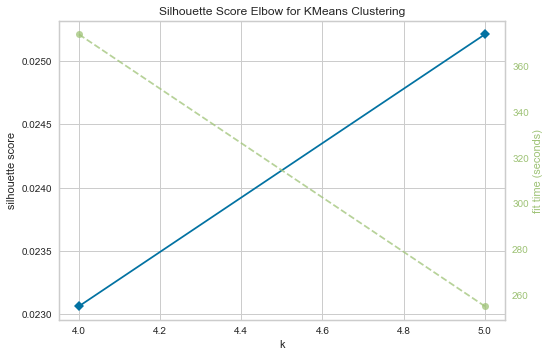

<IPython.core.display.Javascript object>

In [15]:
model = KMeans(n_clusters=5, n_jobs=-1)

visualizer = KElbowVisualizer(model, k=(4, 6), metric="silhouette")
visualizer.fit(vectors)
visualizer.show()

### Perform K-Means Clustering using the optimal number of clusters determined in the previous step.

In [17]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectors)

<IPython.core.display.Javascript object>

### Perform Agglomerative Clustering using the same number of clusters.

In [20]:
model = AgglomerativeClustering(n_clusters=5)
clusters = model.fit_predict(vectors.toarray())

<IPython.core.display.Javascript object>

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [ ]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 5

vectorizer = TfidfVectorizer()
model = NMF(n_components = num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-num_keywords - 1:-1]] for topic in model.components_]

topics = [[x[0] for x in i] for i in results]